In [117]:
#Packages:
import pandas as pd
import numpy as np
import pyreadr as pyr
import sklearn as sk
import matplotlib.pyplot as plt
import scipy as sc
import os
import nltk
import spacy
from contexto.limpieza import *
from contexto.lectura import leer_texto
from contexto.exploracion import grafica_barchart_frecuencias
from contexto.exploracion import obtener_ngramas, par_nubes
from contexto.lematizacion import lematizar_texto
from contexto.correccion import corregir_texto
from contexto.lematizacion import LematizadorSpacy
from contexto.exploracion import obtener_ngramas
from contexto.exploracion import frecuencia_ngramas
from nltk.corpus import stopwords

In [118]:
#Set directory:
os.chdir("C:/Users/juand/Desktop/Big Data/Taller 3/dataPS3")
tr=pyr.read_r("train.Rds") 
tt=pyr.read_r("test.Rds")
print(tr.keys())
print(tt.keys())
df_tr=tr[None] #Train Data frame (Bogotá D.C. y Medellín). 
df_tt=tt[None] #Test Data frame (Cali). 

odict_keys([None])
odict_keys([None])


In [119]:
#Missing values count/share in train.
df_tr.isnull().sum() 
df_tr.isnull().sum()


property_id            0
city                   0
price                  0
surface_total      39044
surface_covered    41745
rooms              24915
bedrooms               0
bathrooms          15032
title                 15
description           36
property_type          0
operation_type         0
lat                    0
lon                    0
dtype: int64

In [120]:
df_tr.drop("rooms", axis=1, inplace=True) #Correct bedrooms data.
df_tt.drop("rooms", axis=1, inplace=True) #Correct bedrooms data.

In [121]:
stopw=stopwords.words('spanish')
stopw.append("br")

In [122]:
###Funcion para limpiar todos los textos
def limp_texto(text):
    #textocorr=lematizar_texto(str(text), lenguaje='es', libreria='spacy', limpiar=False)
    textolimpio=limpieza_texto(str(text), lista_palabras=stopw, quitar_numeros=False, quitar_acentos=True)
    return textolimpio
    

(array([7.940e+02, 7.050e+02, 8.200e+02, 7.830e+02, 9.040e+02, 7.770e+02,
        7.880e+02, 7.770e+02, 7.680e+02, 9.970e+02, 6.560e+02, 9.980e+02,
        8.070e+02, 7.430e+02, 1.165e+03, 8.680e+02, 7.320e+02, 9.200e+02,
        6.980e+02, 9.280e+02, 6.630e+02, 8.090e+02, 7.350e+02, 4.450e+02,
        1.162e+03, 6.170e+02, 5.170e+02, 6.710e+02, 5.840e+02, 6.250e+02,
        3.100e+02, 6.270e+02, 5.450e+02, 3.400e+02, 9.290e+02, 3.840e+02,
        3.590e+02, 4.960e+02, 4.620e+02, 5.870e+02, 6.270e+02, 3.830e+02,
        2.720e+02, 8.670e+02, 2.760e+02, 2.930e+02, 4.760e+02, 3.350e+02,
        6.130e+02, 1.270e+02, 3.240e+02, 2.710e+02, 1.660e+02, 8.720e+02,
        1.550e+02, 1.650e+02, 3.720e+02, 2.350e+02, 5.800e+02, 9.300e+01,
        2.310e+02, 1.890e+02, 1.640e+02, 7.350e+02, 1.410e+02, 2.210e+02,
        2.140e+02, 2.880e+02, 4.800e+02, 5.200e+01, 1.690e+02, 1.500e+02,
        8.400e+01, 5.000e+02, 1.060e+02, 1.150e+02, 3.230e+02, 2.480e+02,
        2.550e+02, 1.600e+01, 5.100e+0

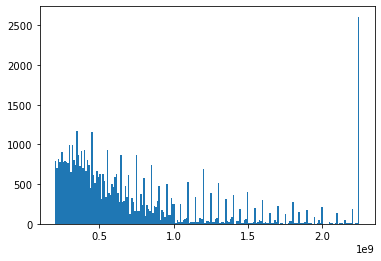

In [123]:
y=sc.stats.mstats.winsorize(df_tr["price"], limits=[0,0.05], inplace=True)
y_millones=y/1000000
plt.hist(y_millones, bins=50, color = (0.17, 0.44, 0.69, 0.9))
plt.xlim(200,2210)
plt.ylabel("Frecuencia")
plt.xlabel("COP (millones)")
plt.savefig("histy_precios.jpg", bbox_inches="tight")
plt.show()

In [124]:
descripciontr = df_tr["description"].tolist()
descripcionlimptr=[limp_texto(i) for i in descripciontr]
listacomptr=" ".join(descripcionlimptr)

In [125]:
descripciontt = df_tt["description"].tolist()
descripcionlimptt=[limp_texto(i) for i in descripciontt]
listacomptt=" ".join(descripcionlimptt)

In [126]:
#Frecuencia bigramas total
bigramastr = frecuencia_ngramas(listacomptr, 1)
bigramastrsort=dict(sorted(bigramastr.items(), key=lambda item: item[1], reverse=True))

In [127]:
bigramastrsort

{'apartamento': 43709,
 'zona': 41209,
 'cocina': 38615,
 'sala': 36442,
 'comedor': 34894,
 'bano': 34375,
 '2': 31984,
 'piso': 28043,
 '3': 26928,
 'dos': 25397,
 'cuenta': 24765,
 'alcobas': 23729,
 'habitaciones': 22636,
 'social': 22609,
 'cerca': 21040,
 'banos': 18348,
 'integral': 18289,
 'parqueadero': 17638,
 'excelente': 17409,
 'estudio': 16120,
 'venta': 16035,
 'acceso': 15539,
 'casa': 15417,
 'cuarto': 15294,
 'tres': 14843,
 'terraza': 14843,
 'principal': 14779,
 'salon': 14679,
 'vista': 14619,
 '1': 14609,
 'servicio': 14070,
 'ubicado': 13647,
 'sector': 13277,
 'edificio': 12865,
 'balcon': 12552,
 'deposito': 11953,
 'ropas': 11870,
 'zonas': 11628,
 'closet': 11587,
 'bao': 11379,
 'parqueaderos': 11288,
 'pisos': 11247,
 'area': 10830,
 'gimnasio': 10669,
 '4': 10604,
 'independiente': 10464,
 'parque': 10040,
 '000': 10010,
 'gas': 9664,
 'privado': 9638,
 'ascensor': 9463,
 'alcoba': 9423,
 '24': 9266,
 'conjunto': 9185,
 'chimenea': 9167,
 'calle': 9017,
 '

In [128]:
#Frecuencia bigramas por precio
#Percentiles de precio
df_trlow=df_tr[df_tr["price"]<=df_tr.price.quantile(0.1)]
descripciontrlow = df_trlow["description"].tolist()
descripcionlimptrlow=[limp_texto(i) for i in descripciontrlow]
listacomptrlow=" ".join(descripcionlimptrlow)
bigramastrlow = frecuencia_ngramas(listacomptrlow, 1)
bigramastrsortlow=dict(sorted(bigramastrlow.items(), key=lambda item: item[1], reverse=True))

In [129]:
bigramastrsortlow

{'zona': 4872,
 'apartamento': 4641,
 'cocina': 4616,
 'piso': 4350,
 '2': 4005,
 'sala': 3847,
 'comedor': 3815,
 'parqueadero': 3206,
 'integral': 3114,
 'cerca': 3097,
 '3': 3089,
 'cuenta': 2650,
 'habitaciones': 2582,
 'banos': 2363,
 'bano': 2301,
 'alcobas': 2220,
 'venta': 1910,
 '1': 1893,
 'acceso': 1890,
 'social': 1854,
 'dos': 1835,
 'excelente': 1796,
 'ubicado': 1792,
 'salon': 1651,
 'conjunto': 1552,
 'sector': 1535,
 'closet': 1526,
 'zonas': 1509,
 '24': 1498,
 'ropas': 1494,
 'gas': 1472,
 'ascensor': 1441,
 'horas': 1282,
 'comercial': 1257,
 'casa': 1256,
 '000': 1254,
 'balcon': 1247,
 'vista': 1236,
 'transporte': 1230,
 'centro': 1216,
 'area': 1206,
 'pisos': 1194,
 'calle': 1167,
 'cubierto': 1131,
 'tres': 1070,
 'verdes': 1069,
 'vigilancia': 1049,
 'principal': 1011,
 'vias': 975,
 'parque': 975,
 'consta': 938,
 'lavanderia': 929,
 'unidad': 925,
 'garaje': 912,
 'comunal': 906,
 'b': 893,
 '4': 885,
 'm2': 873,
 'gimnasio': 863,
 'privado': 859,
 'estudi

In [130]:
#Frecuencia bigramas por precio
#Percentiles de precio
df_trlow=df_tr[df_tr["price"]>=df_tr.price.quantile(0.9)]
descripciontrlow = df_trlow["description"].tolist()
descripcionlimptrlow=[limp_texto(i) for i in descripciontrlow]
listacomptrlow=" ".join(descripcionlimptrlow)
bigramastrlow = frecuencia_ngramas(listacomptrlow, 1)
bigramastrsorthigh=dict(sorted(bigramastrlow.items(), key=lambda item: item[1], reverse=True))

In [131]:
bigramastrsorthigh

{'bano': 4716,
 'zona': 4007,
 'apartamento': 3670,
 'sala': 3544,
 'comedor': 3533,
 'cocina': 3307,
 'servicio': 2760,
 'terraza': 2757,
 'alcobas': 2571,
 'cuenta': 2532,
 '3': 2523,
 'vista': 2471,
 'estudio': 2451,
 'cuarto': 2444,
 'social': 2433,
 'casa': 2428,
 'habitaciones': 2334,
 'dos': 2280,
 '2': 2154,
 'bao': 2098,
 'tres': 2025,
 'piso': 1934,
 '4': 1907,
 'chimenea': 1685,
 'principal': 1671,
 'parqueaderos': 1616,
 'independiente': 1592,
 'privado': 1587,
 'excelente': 1578,
 'edificio': 1562,
 'salon': 1523,
 'venta': 1433,
 'espectacular': 1399,
 'acceso': 1360,
 'gimnasio': 1358,
 'cada': 1305,
 'garajes': 1271,
 'amplia': 1261,
 'espacios': 1258,
 'banos': 1254,
 'area': 1205,
 'zonas': 1195,
 'alcoba': 1161,
 'm2': 1160,
 'independientes': 1146,
 'cerca': 1133,
 'ciudad': 1110,
 'deposito': 1107,
 'amplio': 1091,
 'sector': 1086,
 'cuatro': 1076,
 'vestier': 1047,
 'pisos': 1037,
 'ascensor': 1005,
 '1': 1003,
 'parque': 986,
 'ubicado': 981,
 'balcon': 971,
 'ni

In [132]:
###Dummies de cada caracteristicas
#Cleaning description
#Training ######### 
descripciontr = df_tr["description"].tolist()
descripcionlimptr=[limp_texto(i) for i in descripciontr]
df_tr["description"]=pd.DataFrame(descripcionlimptr)
#title
titulotr = df_tr["title"].tolist()
titulolimptr=[limp_texto(i) for i in titulotr]
df_tr["title"]=pd.DataFrame(titulolimptr)

#Test#############
descripciontr = df_tt["description"].tolist()
descripcionlimptr=[limp_texto(i) for i in descripciontr]
df_tt["description"]=pd.DataFrame(descripcionlimptr)
#title
titulotr = df_tt["title"].tolist()
titulolimptr=[limp_texto(i) for i in titulotr]
df_tt["title"]=pd.DataFrame(titulolimptr)


In [133]:
## Dummies e imputacion de variables
##Imputar baños
df_tr["bathrooms"].fillna(' ', inplace=True)
df_tt["bathrooms"].fillna(' ', inplace=True)

df_tr["bathrooms"]=np.where(df_tr["bathrooms"]==" ", df_tr["bedrooms"]/1.5, df_tr["bathrooms"])
df_tt["bathrooms"]=np.where(df_tt["bathrooms"]==" ", df_tt["bedrooms"]/1.5, df_tt["bathrooms"])


In [134]:
#Get dummies tipo propiedad
tipo_d=pd.get_dummies(df_tr["property_type"], prefix="tipo")
df_tr=pd.merge(df_tr, tipo_d, left_index=True, right_index=True)
tipo_dt=pd.get_dummies(df_tt["property_type"], prefix="tipo")
df_tt=pd.merge(df_tt, tipo_dt, left_index=True, right_index=True)

In [ ]:
#Descriptive statistics:
tipo_d=pd.get_dummies(df_tr["property_type"], prefix="tipo")
df_tr=pd.merge(df_tr, tipo_d, left_index=True, right_index=True)
tipo_dt=pd.get_dummies(df_tt["property_type"], prefix="tipo")
df_tt=pd.merge(df_tt, tipo_dt, left_index=True, right_index=True)

#Train:
df_tr["bathrooms"]=df_tr["bathrooms"].astype("float")
ds_tr=(df_tr[["tipo_Apartamento", "surface_total", "bedrooms", "bathrooms"]].describe(include="all"))
ds_tr=ds_tr.T
ds_tr=ds_tr[["count", "mean", "std", "min", "50%", "max"]]
ds_tr=ds_tr.round(2)

#Test:
df_tt["bathrooms"]=df_tt["bathrooms"].astype("float")
ds_tt=(df_tt[["tipo_Apartamento", "surface_total", "bedrooms", "bathrooms"]].describe(include="all"))
ds_tt=ds_tt.T
ds_tt=ds_tt[["count", "mean", "std", "min", "50%", "max"]]
ds_tt=ds_tt.round(2)

In [135]:
###Imputar metros cuadrados
###Metros     [0-9]+\,*\.*\s*[0-9]+\s*m[0-9]*[a-z]*[0-9]*
##Baños       [0-9]\s*ba[a-z]*
## admin      [0-9]*\s*[a-z]*\s*[a-z]*\s*ad[a-z]*\s*[0-9]*
## arriendo   [0-9]*\s*[a-z]*\s*arr[a-z]*\s*[0-9]*\.*\'*[0-9]*\.*[0-9]*
## Precio venta


##Piscinas pi[a-z][a-z][a-z]+
## Zona verde  zona[a-z]*\s*verde[a-z]*
## “sala chimenea”  sala\s*[a-z]*\s*[a-z]*\s*chim[a-z]*
## espectacular espe[a-z]*r
## ascensor privado as*c*ensor\s*priv*b*ado
## pisos madera  pi*s*os*\s*madera*
## “comedor independiente” comedor*\s*in*m*depen(diente)*
### “pisos ceramica” pi*s*os*\s*c*s*erami(ca)*
## “salon social” salo*n*\s*so*c*s*ial
# vigilancia  vig*j*ilan(c*s*i)*  seguridad 
## “red gas” red\s*gas*
## “centro comercial”  centr*o*\s*comerc*s*i*al*
## “transporte publico”  
## condominio  condo*mi*nio
## campestre cam*n*pe*s*tr*e
## penthouse pe*nt*\s*hous*c*e
## apartaestudio apa*r*ta*o*\s*est*u*di*o
## remodelado remo*delado* reformado reformado* estrenar es*tre*nar*
## ascensor as*c*ens*z*or*
## duplex dupl*ex*
## jacuzzi jacuzz*i
## gimnasio gi*y*mn*a*c*s*i*o*
## esquinero esqu*inero*a*
## aire acondicionado aire's*acondicionado
## local lo*cal*
## vista v*b*ista


In [148]:
destr=df_tr['description'].tolist()
destt=df_tt['description'].tolist()
##Extraer metros
listametrostr=([re.search(r'[0-9]+\,*\.*[0-9]+\s*m[0-9]*e*t*r*o*s*[0-9]*', i).group() 
if bool(re.search(r'[0-9]+\,*\.*[0-9]+\s*m[0-9]*e*t*r*o*s*[0-9]*', i))==True else 'na'
for i in destr ])

listametrostt=([re.search(r'[0-9]+\,*\.*[0-9]+\s*m[0-9]*e*t*r*o*s*[0-9]*', i).group() 
if bool(re.search(r'[0-9]+\,*\.*[0-9]+\s*m[0-9]*e*t*r*o*s*[0-9]*', i))==True else 'na'
for i in destt ])

In [150]:
###Creacion de dummies
#piscina
destr=df_tr['description'].tolist()
list=[bool(re.search(r'pis*c*ina', i)) for i in destr]
df_tr['piscina']=pd.DataFrame(list)
destt=df_tt['description'].tolist()
listtt=[bool(re.search(r'pis*c*ina', i)) for i in destt]
df_tt['piscina']=pd.DataFrame(listtt)

#zona verde 
list=[bool(re.search(r'zona[a-z]*\s*verde[a-z]*', i)) for i in destr]
df_tr['zonav']=pd.DataFrame(list)
listtt=[bool(re.search(r'zona[a-z]*\s*verde[a-z]*', i)) for i in destt]
df_tt['zonav']=pd.DataFrame(listtt)

#chimenea
list=[bool(re.search(r'chime[a-z]*', i)) for i in destr]
df_tr['chim']=pd.DataFrame(list)
listtt=[bool(re.search(r'chime[a-z]*', i)) for i in destt]
df_tt['chim']=pd.DataFrame(listtt)

#espectacular
list=[bool(re.search(r'espe[a-z]*r', i)) for i in destr]
df_tr['espectacular']=pd.DataFrame(list)
listtt=[bool(re.search(r'espe[a-z]*r', i)) for i in destt]
df_tt['espectacular']=pd.DataFrame(listtt)

#ascensor privado
list=[bool(re.search(r'as*c*ensor\s*priv*b*ado', i)) for i in destr]
df_tr['ascensorpriv']=pd.DataFrame(list)
listtt=[bool(re.search(r'as*c*ensor\s*priv*b*ado', i)) for i in destt]
df_tt['ascensorpriv']=pd.DataFrame(listtt)

#piso madera
list=[bool(re.search(r'pi*s*os*\s*madera*', i)) for i in destr]
df_tr['pisomadera']=pd.DataFrame(list)
listtt=[bool(re.search(r'pi*s*os*\s*madera*', i)) for i in destt]
df_tt['pisomadera']=pd.DataFrame(listtt)

#comedor independiente
list=[bool(re.search(r'comedor*\s*in*m*depen(diente)*', i)) for i in destr]
df_tr['comedorind']=pd.DataFrame(list)
listtt=[bool(re.search(r'comedor*\s*in*m*depen(diente)*', i)) for i in destt]
df_tt['comedorind']=pd.DataFrame(listtt)

#piso ceramica
list=[bool(re.search(r'pi*s*os*\s*c*s*erami(ca)*', i)) for i in destr]
df_tr['pisoceramica']=pd.DataFrame(list)
listtt=[bool(re.search(r'pi*s*os*\s*c*s*erami(ca)*', i)) for i in destt]
df_tt['pisoceramica']=pd.DataFrame(listtt)

#salon social
list=[bool(re.search(r'salo*n*\s*so*c*s*ial', i)) for i in destr]
df_tr['salonsocial']=pd.DataFrame(list)
listtt=[bool(re.search(r'salo*n*\s*so*c*s*ial', i)) for i in destt]
df_tt['salonsocial']=pd.DataFrame(listtt)

#vigilancia
list=[bool(re.search(r'vig*j*ilan(c*s*i)*', i)) for i in destr]
df_tr['vigilancia']=pd.DataFrame(list)
listtt=[bool(re.search(r'vig*j*ilan(c*s*i)*', i)) for i in destt]
df_tt['vigilancia']=pd.DataFrame(listtt)

#seguridad
list=[bool(re.search(r'seguridad*', i)) for i in destr]
df_tr['seguridad']=pd.DataFrame(list)
listtt=[bool(re.search(r'seguridad*', i)) for i in destt]
df_tt['seguridad']=pd.DataFrame(listtt)

#red gas
list=[bool(re.search(r'red\s*gas*', i)) for i in destr]
df_tr['redgas']=pd.DataFrame(list)
listtt=[bool(re.search(r'red\s*gas*', i)) for i in destt]
df_tt['redgas']=pd.DataFrame(listtt)

#centrocomercial
list=[bool(re.search(r'centr*o*\s*comerc*s*i*al*', i)) for i in destr]
df_tr['centrocom']=pd.DataFrame(list)
listtt=[bool(re.search(r'centr*o*\s*comerc*s*i*al*', i)) for i in destt]
df_tt['centrocom']=pd.DataFrame(listtt)

#transporte publico
list=[bool(re.search(r'transporte\s*publico', i)) for i in destr]
df_tr['transportep']=pd.DataFrame(list)
listtt=[bool(re.search(r'transporte\s*publico', i)) for i in destt]
df_tt['transportep']=pd.DataFrame(listtt)

#condominio
list=[bool(re.search(r'condo*mi*nio', i)) for i in destr]
df_tr['condominio']=pd.DataFrame(list)
listtt=[bool(re.search(r'condo*mi*nio', i)) for i in destt]
df_tt['condominio']=pd.DataFrame(listtt)

#campestre
list=[bool(re.search(r'cam*n*pe*s*tr*e', i)) for i in destr]
df_tr['campestre']=pd.DataFrame(list)
listtt=[bool(re.search(r'cam*n*pe*s*tr*e', i)) for i in destt]
df_tt['campestre']=pd.DataFrame(listtt)

#penthouse 
list=[bool(re.search(r'pe*nt*\s*hous*c*e', i)) for i in destr]
df_tr['penthouse']=pd.DataFrame(list)
listtt=[bool(re.search(r'pe*nt*\s*hous*c*e', i)) for i in destt]
df_tt['penthouse']=pd.DataFrame(listtt)

#apartaestudio
list=[bool(re.search(r'apa*r*ta*o*\s*est*u*di*o', i)) for i in destr]
df_tr['apartaestudio']=pd.DataFrame(list)
listtt=[bool(re.search(r'apa*r*ta*o*\s*est*u*di*o', i)) for i in destt]
df_tt['apartaestudio']=pd.DataFrame(listtt)

#reformado 
list=[bool(re.search(r'remo*delado*', i)) for i in destr]
df_tr['remodelado']=pd.DataFrame(list)
listtt=[bool(re.search(r'remo*delado*', i)) for i in destt]
df_tt['remodelado']=pd.DataFrame(listtt)

#reformado
list=[bool(re.search(r'reformado*', i)) for i in destr]
df_tr['reformado']=pd.DataFrame(list)
listtt=[bool(re.search(r'reformado*', i)) for i in destt]
df_tt['reformado']=pd.DataFrame(listtt)

#estrenar
list=[bool(re.search(r'es*tre*nar*', i)) for i in destr]
df_tr['estrenar']=pd.DataFrame(list)
listtt=[bool(re.search(r'es*tre*nar*', i)) for i in destt]
df_tt['estrenar']=pd.DataFrame(listtt)

#ascensor
list=[bool(re.search(r'as*c*ens*z*or*', i)) for i in destr]
df_tr['ascensor']=pd.DataFrame(list)
listtt=[bool(re.search(r'as*c*ens*z*or*', i)) for i in destt]
df_tt['ascensor']=pd.DataFrame(listtt)

#duplex
list=[bool(re.search(r'dupl*ex*', i)) for i in destr]
df_tr['duplex']=pd.DataFrame(list)
listtt=[bool(re.search(r'dupl*ex*', i)) for i in destt]
df_tt['duplex']=pd.DataFrame(listtt)

#jacuzzi
list=[bool(re.search(r'jacuzz*i', i)) for i in destr]
df_tr['jacuzzi']=pd.DataFrame(list)
listtt=[bool(re.search(r'jacuzz*i', i)) for i in destt]
df_tt['jacuzzi']=pd.DataFrame(listtt)

#gimnasio 
list=[bool(re.search(r'gi*y*mn*a*c*s*i*o*', i)) for i in destr]
df_tr['gym']=pd.DataFrame(list)
listtt=[bool(re.search(r'gi*y*mn*a*c*s*i*o*', i)) for i in destt]
df_tt['gym']=pd.DataFrame(listtt)

#esquinero  
list=[bool(re.search(r'esqu*inero*a*', i)) for i in destr]
df_tr['esquinero']=pd.DataFrame(list)
listtt=[bool(re.search(r'esqu*inero*a*', i)) for i in destt]
df_tt['esquinero']=pd.DataFrame(listtt)

#aire acondicionado   aire's*acondicionado
list=[bool(re.search(r'aire\sacondicionado', i)) for i in destr]
df_tr['ac']=pd.DataFrame(list)
listtt=[bool(re.search(r'aire\sacondicionado', i)) for i in destt]
df_tt['ac']=pd.DataFrame(listtt)

#local lo*cal*
list=[bool(re.search(r'lo*cal*', i)) for i in destr]
df_tr['local']=pd.DataFrame(list)
listtt=[bool(re.search(r'lo*cal*', i)) for i in destt]
df_tt['local']=pd.DataFrame(listtt)

#vista v*b*ista
list=[bool(re.search(r'v*b*ista', i)) for i in destr]
df_tr['vista']=pd.DataFrame(list)
listtt=[bool(re.search(r'v*b*ista', i)) for i in destt]
df_tt['vista']=pd.DataFrame(listtt)

#parqueadero
list=[bool(re.search(r'v*b*ista', i)) for i in destr]
df_tr['parqueadero']=pd.DataFrame(list)
listtt=[bool(re.search(r'v*b*ista', i)) for i in destt]
df_tt['vista']=pd.DataFrame(listtt)

#garage
list=[bool(re.search(r'v*b*ista', i)) for i in destr]
df_tr['garage']=pd.DataFrame(list)
listtt=[bool(re.search(r'v*b*ista', i)) for i in destt]
df_tt['']=pd.DataFrame(listtt)


In [23]:
#Descriptive statistics:
ds=(df_tr[["surface_total", "bedrooms", "bathrooms"]].describe(include="all"))
ds=ds.T
ds=ds[["count", "mean", "std", "min", "50%", "max"]]
ds=ds.round(2)
print(ds.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &    count &    mean &      std &   min &    50\% &       max \\
\midrule
surface\_total &  12393.0 &  221.84 &  2637.04 &  15.0 &  124.0 &  198000.0 \\
bedrooms      &  51437.0 &    3.10 &     1.36 &   0.0 &    3.0 &      11.0 \\
bathrooms     &  36405.0 &    2.92 &     1.21 &   1.0 &    3.0 &      20.0 \\
\bottomrule
\end{tabular}

